# Step 1. 스티커/ 사진 구하기 or 만들기

**(1) flation에 들어가서 고양이 수염 이미지를 봤습니다. 너무 제 맘에 들지 않아서 저는 새로 만들었습니다. 고양이 수염 이미지는 cat_whiskers.png로 저장했습니다.**    

**(2) 핸드폰으로 1:1 비율의 셀카를 한 장 촬영했습니다. 제 얼굴 사진은 my_face.jpg로 저장해줬습니다.**

# Step 2. 사진 준비하기

**1. 우선 작업 디렉토리 구조를 세팅하고, Step 1에서 만들고 촬영한 이미지를 넣어줍니다. 저는 ```pr_imgages```파일을 만들어 여기에 이미지들을 넣어줬습니다.**

```
$ mkdir -p ~/aiffel/camera_sticker/pr_models
$ mkdir -p ~/aiffel/camera_sticker/pr_images
```

**2. 이미지 처리 관련 패키지인 opencv, cmake, dlib을 설치합니다.**

**3. 이미지 처리에 필요한 opencv와 이미지 출력에 필요한 matplotlib을 읽어옵니다. 잘 읽어왔는지 보기 위해 확인용으로 귀여운 고양이를 한번 출력해줍니다.**

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("˓˓ก₍⸍⸌̣ʷ̣̫⸍̣⸌₎ค˒˒")

˓˓ก₍⸍⸌̣ʷ̣̫⸍̣⸌₎ค˒˒


**4. 준비한 이미지를 opencv로 읽어오고, 이미지 크기를 변경합니다. 출력용 이미지는 따로 보관합니다.**

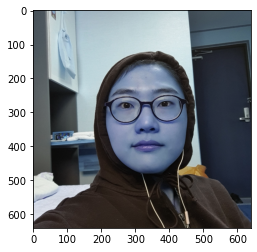

In [2]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/pr_images/my_face.jpg'
img_bgr = cv2.imread(my_image_path)   
img_bgr = cv2.resize(img_bgr, (640, 640)) # 640x640의 크기로 사이즈 조정
img_show = img_bgr.copy() # 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

**5. 똘똘이 스머프인가요? 얼굴색이 이상하군요.    
opencv는 RGB 채널이 아닌 BGR 채널을 이용하기에 RGB 이미지로 바꿔줍니다.**

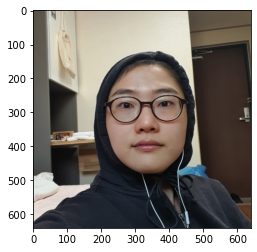

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# Step 3. 얼굴 검출 & 랜드마크 검출 하기

**6. Objection detection 기술을 이용해 얼굴의 위치를 찾습니다.     
이를 위해 dlib의 face detector를 선언합니다.**

In [4]:
import dlib
detector_hog = dlib.get_frontal_face_detector() 
print("˓˓ก₍⸍⸌̣ʷ̣̫⸍̣⸌₎ค˒˒")

˓˓ก₍⸍⸌̣ʷ̣̫⸍̣⸌₎ค˒˒


**7. detector를 이용해 얼굴의 bounding box를 추출합니다.**

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) #  피라미드로 이미지를 크게 키워봄
print("˓˓ก₍⸍⸌̣ʷ̣̫⸍̣⸌₎ค˒˒")

˓˓ก₍⸍⸌̣ʷ̣̫⸍̣⸌₎ค˒˒


**8. 찾은 얼굴을 화면에 출력합니다.**

rectangles[[(200, 201) (468, 468)]]


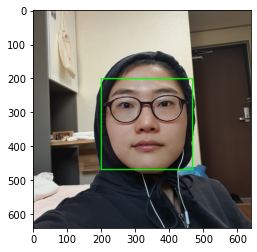

In [6]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left() # x
    t = dlib_rect.top() # y
    r = dlib_rect.right() # x
    b = dlib_rect.bottom() # y

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

**9. bounding box로 잘라낸 얼굴 이지에 Object keypoint estimation 알고리즘을 사용해 box 내부의 keypoint를 예측합니다. 이를 위해 dlib의 제공되는 모델을 다운받이 pr_models 디렉토리에 넣고 압축을 풀어줍니다.**

```
$ wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
$ mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/pr_models
$ cd ~/aiffel/camera_sticker && bzip2 -d ./pr_models/shape_predictor_68_face_landmarks.dat.bz2
```

**10. 저장한 랜드마크 모델을 불러옵니다.**

In [7]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/pr_models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("˓˓ก₍⸍⸌̣ʷ̣̫⸍̣⸌₎ค˒˒")

˓˓ก₍⸍⸌̣ʷ̣̫⸍̣⸌₎ค˒˒


**11. ```landmark_predictor```는 RGB 이미지와 얼굴 bounding box 정보를 입력받아 ```dlib.full_object_detection```을 반환합니다.**

In [8]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


**12. 랜드마크를 사진에 출력합니다.**

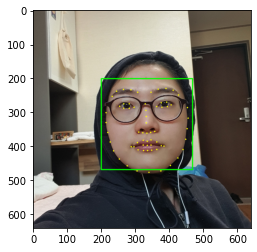

In [9]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # 랜드마크를 노란색으로

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# Step 4. 스티커 적용 위치 확인하기

**13. 고양이 수염이 적용될 위치는 랜드마크를 사용해 계산해야 합니다. 턱, 눈, 입, 코(landmark 2, 30, 48, 36번)이 주어졌는데, 저는 landmark 33번 코 끝으로 하겠습니다. 랜드마크를 가운데 두고 스티커가 생성되면 될 것 같습니다.**    

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33]) # 보다 자연스러운 수염 위치를 위해 33번 랜드마크 사용 
    
    x = landmark[33][0] # 랜드마크 좌표이자 처음 스티커가 생성될 좌표
    y = landmark[33][1]
    
    w = dlib_rect.width() # 스티커 크기
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(334, 361)
(x,y) : (334,361)
(w,h) : (269,269)


**14. 준비한 스티커를 읽고 사이즈를 재조정합니다.**

In [11]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/pr_images/cat_whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(269, 269, 3)


**15. 원본 이미지에 스티커를 추가하기 위해 좌료를 조정합니다. 이미지의 시작점은 top-left입니다. 이렇게 조정하면 bounding box의 top-left와 스티커의 top-left 지점이 일치하게 됩니다.**

In [12]:
refined_x = x - w//2 # left
refined_y = y - h//2 # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (200,227)


**16. 스티커 이미지가 나올 부분의 사진이 잘릴 경우에는 스티커 이미지가 이미지 범위 밖을 나가서 제거해주어야 합니다. 그때는 좌표의 수가 음수가 나오는데, 그 경우에는 예외처리가 필요해서 그만큼 제거해주어야 합니다.    
지금 제 사진에는 그런 부분이 없지만 나중에 생길 수 있으니 처리를 해둡니다.**

In [13]:
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0
if refined_x < 0:
    img_sticker = img_sticker[-refined_x:]
    refined_x = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (200,227)


# Step 5. 스티커 적용하기

**17. ```sticker_area```는 원본 이미지에서 스티커 적용 부분을 크롭한 이미지입니다. 스터키 이미지에서 사용할 부분은 투명한 부분(0인 부분)이 아닌 색이 있는 부분입니다. 그래서 ```np.where```을 통해 ```img_sticker``` 가 0인 부분은 ```sticker_area```를, 0이 아닌 부분을 ```img_sticker```를 사용합니다.** 

In [14]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] # 높이, 너비 

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

이 부분을 이해하는 데에 장장 이틀이 걸렸습니다. 제가 헷갈렸던 부분은 이것입니다.
> 왜 refind_y에서 refind_y+img_sticker.shape[0]가나?

refind_y는 197이고, refind_y+img_sticker.shape[0]는 197+269니까 굳이 너비만큼인 269만 가면 되지 197은 왜 더 가는지 이해가 되지 않았습니다. 

몇번씩 공책이랑 핸드폰으로 그림을 그리고 나서야 저는 드디어 좌표는 거리고, 거리의 시작은 원점이라는 사실을 깨달았습니다. 그래서 출발점이 0이니까 197만큼 가야 내가 원하는 시작점에 도달하는 것이고, 197+269만큼 가야 내가 원하는 시작점에서 너비만큼 더 갈 수 있다는 사실을요!

누구에겐 사소할 수 있지만 저는 지금 아르키메데스가 유레카를 외친 것 마냥 박힌 부분이 뻥 뚫려서 기쁜 마음에 해당 부분에 대한 소감을 달아봅니다. (2021.01.14 오후 9시가 넘어서야)

**18. 이미지를 출력합니다.**

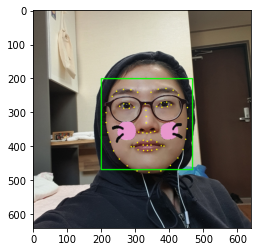

In [15]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

**19. bounding box와 landmark를 제거하고 출력합니다.**

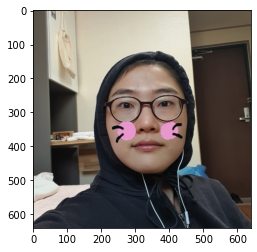

In [16]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

**20. 좀 더 자연스러운 스티커를 위해 불투명하게 만들어 봅니다. 원본 사진과 스티커가 부착된 사진을 합성해서 투명도를 조절해주었습니다. 진표 퍼실님의 조언 감사드립니다!**

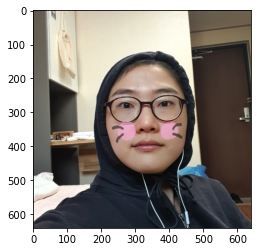

In [17]:
img_bgr= cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
trans_img = cv2.addWeighted(img_rgb, 0.5, img_bgr,0.6,0) # 원본 사진과 스티커 부착된 사진 합성
plt.imshow(trans_img)
plt.show()

## (1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해보세요.

**1. 왼쪽 뺨이 정면을 향했을 때(고개를 오른쪽으로 돌렸을 때): 스티커가 반영됐으나 고개를 돌린만큼 스티커는 돌아가지 않았다.**

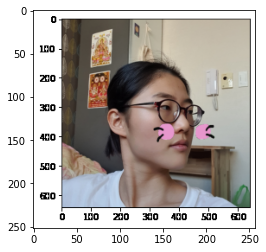

In [18]:
my_img_left = os.getenv('HOME')+'/aiffel/camera_sticker/pr_faces/my_left_cat.png'
img_bgr_left = cv2.imread(my_img_left)   
img_rgb_left = cv2.cvtColor(img_bgr_left, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_left)

**2. 오른쪽 뺭이 정면을 향할 때(고개를 왼쪽으로 돌렸을 때): 스티커가 반영됐으나 고개를 돌린만큼 스티커는 돌아가지 않았다.**

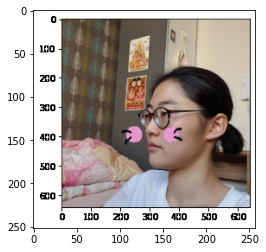

In [19]:
my_img_right = os.getenv('HOME')+'/aiffel/camera_sticker/pr_faces/my_right_cat.png'
img_bgr_right = cv2.imread(my_img_right)   
img_rgb_right = cv2.cvtColor(img_bgr_right, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_right)

**3. 정수리가 정면을 향할 때(고개를 숙였을 때): 저 각도라면 인식이 될 법도 한 것 같은데 바운딩 박스가 만들어지지 않아 스티커 반영이 되지 않았디.**

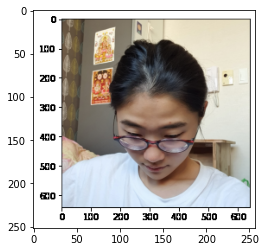

In [20]:
my_img_down = os.getenv('HOME')+'/aiffel/camera_sticker/pr_faces/my_down_cat.png'
img_bgr_down = cv2.imread(my_img_down)   
img_rgb_down = cv2.cvtColor(img_bgr_down, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_down)

**4. 턱이 정면을 향할 때(고개를 들었을 때): 역시 바운딩 박스가 만들어지지 않아 스티커 반영이 되지 않았다. 헤어라인쪽이 보이지 않아서 그런 것 같다.**

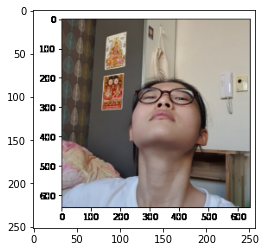

In [21]:
my_img_up = os.getenv('HOME')+'/aiffel/camera_sticker/pr_faces/my_up_cat.png'
img_bgr_up = cv2.imread(my_img_up)   
img_rgb_up = cv2.cvtColor(img_bgr_up, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_up)

**5. 침대에 엎드려 고개를 옆으로 향할 때: 왼쪽 볼이 눌려서 윤곽이 뚜렷히 나타나지 않아 인식이 되지 않는 것 같다. 생각해보니 내가 안경을 써서 더 인식을 못하는 것 같다.**

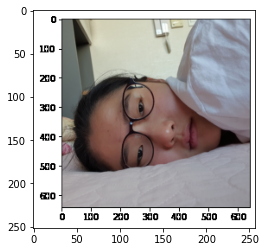

In [22]:
my_img_bedside = os.getenv('HOME')+'/aiffel/camera_sticker/pr_faces/my_bedside_cat.png'
img_bgr_bedside = cv2.imread(my_img_bedside)   
img_rgb_bedside = cv2.cvtColor(img_bgr_bedside, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_bedside)

**6. 멀리서 찍었을 때: 멀리 찍는다고 찍었는데 원룸이 좁아서 인식이 된 것 같다. 나름 얼굴부분은 작은 것 같은데 정면은 참 인식을 잘한다.**

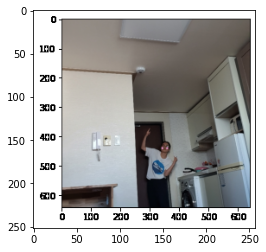

In [23]:
my_img_far = os.getenv('HOME')+'/aiffel/camera_sticker/pr_faces/my_far_cat.png'
img_bgr_far = cv2.imread(my_img_far)   
img_rgb_far = cv2.cvtColor(img_bgr_far, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_far)

**7. 고개를 갸우뚱했을 때: 정면에서 고개를 왼쪽으로 45도 숙였는데 인식이 되지 않았다. 포징이 잘 되지 않은 것인지 추측해본다.**

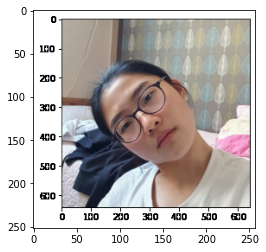

In [24]:
my_img_tilt = os.getenv('HOME')+'/aiffel/camera_sticker/pr_faces/my_tilt_cat.png'
img_bgr_tilt = cv2.imread(my_img_tilt)   
img_rgb_tilt = cv2.cvtColor(img_bgr_tilt, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_tilt)

**8. 정면으로 찍었는데 어두운 곳에서 찍었을 때: 안될 줄 알았는데 정면으로 찍어서인지 잘 잡았다. 정말 귀신 같다. 아무대나 어두운 곳을 찍고 스티커 앱을 돌렸는데 이렇게 결과물이 나온다면 난 그 자리에서 주저앉을 것 같다.**

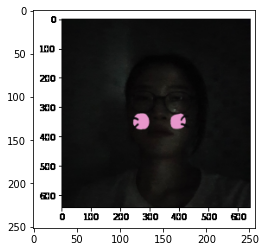

In [25]:
my_img_dark = os.getenv('HOME')+'/aiffel/camera_sticker/pr_faces/my_dark_cat.png'
img_bgr_dark = cv2.imread(my_img_dark)   
img_rgb_dark = cv2.cvtColor(img_bgr_dark, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_dark)

## (2) 문제점이 무엇인지 최대한 자세하게 기록해보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

>- 얼굴 각도에 따라 스티커가 어떻게 변해야 할까요?

얼굴 각도에 따라 스티커는 작아지고, 커지고, 기울어질 줄 알아야 하는데 아직 제가 만든 스티커 어플리케이션은 이런 점을 반영하지 못했습니다. 그래서 오른쪽으로, 왼쪽으로 고개를 돌렸을 때와 같이 얼굴과 스티커 사이에 빈 공간이 확연하게 보였습니다.

>- 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?

저는 정면을 제외하고 7가지 각도로 실험을 해보았습니다. 그중 왼쪽과 오른쪽, 멀리서 찍은 것은 스티커가 반영이 되었습니다. 하지만 고개를 숙인 것, 고개를 든 것, 침대에서 옆으로 누운 것, 고개를 갸우뚱한 것에서는 스티커가 반영되지 않았습니다.  어디가 문제일까 궁금해 코드를 살펴보니 bounding box부터 생성이 되지 않았습니다.    

우리는 dlib을 import하고 ```dlib.get_frontal_face_detector()```을 선언했습니다. 그래서 정면에 있는 얼굴은 인식을 잘하지만 그외 얼굴 각도는 인식을 잘 못하는 것이라고 추측합니다. 정면에서 약간만 다른 왼쪽과 오른쪽으로 고개를 돌린 얼굴은 포징 단계가 잘 적용됐지만 그외에서는 잘 포징 되지 않았다라고 생각합니다.      

다른 각도들은 못할 수 있다고 하더라고 갸우뚱한 포즈를 잡지 못한 건 참 안타깝습니다. 왜 일까 생각해보았는데, 고개가 기울어진 만큼 포징 단계에서 각도를 정면으로 맞춰줘야 하는데 그 부분이 잘 되지 않았으리라고 저는 추측합니다.    

사실 멀리서 찍은 것도 되지 않아야 하는데, 집 안이 좁아서 멀리서 찍는다고 찍었지만 인식이 가능한 거리라서 인식이 된 것이라고 생각합니다.

>- 실행 속도가 중요할까요?

실행 속도는 중요합니다. 우리가 길거리에서 찍는 스티커 사진기에서 인식이 느려 사진 출력에 세월아 네월아 시간이 걸린다면 아무도 사용하지 않을 것입니다. 또한 비디오나 영상으로 기술이 넘어간다면 실시간으로 적용되어야 하기 때문에 빠른 실행 속도가 더 중요하다고 생각합니다. 텐서플로우를 사용하면 더 빠르게 된다던데 진짜인지는 좀 궁금합니다.

>- 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

스티커 앱에서의 정확도란 얼굴을 인식하는 정도의 정확도라고 보면, 스티커 앱에서 정확도는 제일 중요한 사항이라고 생각합니다. 특히 특정 신체부위나 사물, 물체에 스티커를 입히는 앱이라면 대상을 파악하고 스티커가 입혀질 영역을 제대로 도출하는 것이 우선이기 때문입니다.    

제가 다양한 각도로 실험을 했을 때 일부 각도에서 bounding box를 그리지 못했습니다. 이를 통해 정확도가 없다면 스티커 영역을 설정하고 스티커를 붙이는 코드가 아무리 잘 짜여져 있어도 소용이 없게 됩니다.

# 루브릭 평가

1. 저만의 카메라앱 기능 구현했습니다. 정면에서는 정말 스티커가 반영됩니다. 하지만 정면이 아닌 다른 각도에서는 잘 반영되지 않는 부분은 개선점입니다.

2. 스티커 이미지를 정확한 원본 위치에 반영했습니다. 오래걸렸지만 얼굴 정중앙에 오게 좌표계산을 완료할 수 있었습니다.

3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석을 하려고 노력했습니다. 다양한 각도와 어두운 상황에서의 원본 이미지를 만들어 반영해보면서 제가 만든 스티커앱이 어떤 한계를 가지고 있는지 파악할 수 있었습니다.

# 회고

정말 오래 걸린 프로젝트였습니다. 초반부까지는 괜찮았는데 스티커 영역에서 정말 오래 막혀있었습니다. 이미지만 보다보니 제가 다루고 있는 것이 좌표, 숫자라는 것을 까맣게 잊고 있었습니다. 며칠 동안 골머리를 앓긴했지만 고생한 만큼 문제가 해결됐을 때 쾌감도 컸습니다.     

직접 스티커 앱을 만들어보니 스노우와 스냅챗같은 여타 카메라 어플 기능이 얼마나 대단한 것인지 깨달았습니다. 심지어 사진이 아닌 영상을 다루면서 다양한 피쳐들을 서비스한다니 놀라울 따름입니다. 소비자의 입장에서는 이런 어플을 사용할 때 조금만 인식이 안되도 짜증이 났었는데, 생산자 입장이 되어보니 앞으로는 좀더 감사한 마음을 가지고 어플을 사용해야 겠다는 생각이 들었습니다. 